# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")   # to suppress warnings in the notebook

In [16]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
import os
os.chdir(r'C:\Users\Niroj\Desktop\EDA assignment')

In [21]:
# Try loading one file
# raw string in Python (written with an r prefix like r"C:\Users\Gayatri\file.parquet") tells Python not to interpret backslashes (\) as escape characters.

df = pd.read_parquet(r'Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [22]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [23]:
df.shape

(3041714, 19)

In [24]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [30]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [31]:
# from google.colab import drive
# drive.mount('/content/drive')

In [32]:
# Select the folder having data files
import os
print(os.getcwd())

C:\Users\Niroj\Desktop\EDA assignment


In [33]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
# read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

In [34]:
# Select the folder having data files
os.chdir(r'Datasets and Dictionary\trip_records')

In [35]:
# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])
print(file_list)

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']


In [36]:
# initialise an empty dataframe
new_dataframe= pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)

        # Convert pickup datetime column to pandas datetime
        df_month = df_month.dropna(subset =['tpep_pickup_datetime'])
        df_month['tpep_pickup_datetime']= pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Create new columns for date and hour for grouping
        df_month['date']=df_month['tpep_pickup_datetime'].dt.date
        df_month['hour']=df_month['tpep_pickup_datetime'].dt.hour
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        # Loop through dates and then loop through every hour of each date

        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]
            
            # Iterate through each hour of the selected date
            for hour in df_day['hour'].unique():
                df_hour = df_day[df_day['hour'] == hour]

            
                # Sample 5% of the hourly data randomly
                df_sample = df_hour.sample(frac=0.007, random_state=42) if len(df_hour) >20 else df_hour
                # add data of this hour to the dataframe
                sampled_data= pd.concat([sampled_data, df_sample], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        new_dataframe = pd.concat([new_dataframe, sampled_data], ignore_index =True) # we initialised this empty DF earlier
        print(f"Processed {file_name}, sampled shape ={sampled_data.shape}")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print ("final combined sampled dataframe shape:", new_dataframe.shape)

Processed 2023-1.parquet, sampled shape =(21336, 21)
Processed 2023-10.parquet, sampled shape =(24425, 21)
Processed 2023-11.parquet, sampled shape =(23146, 21)
Processed 2023-12.parquet, sampled shape =(23362, 21)
Processed 2023-2.parquet, sampled shape =(23803, 21)
Processed 2023-3.parquet, sampled shape =(22980, 21)
Processed 2023-4.parquet, sampled shape =(19580, 21)
Processed 2023-5.parquet, sampled shape =(20263, 21)
Processed 2023-6.parquet, sampled shape =(22872, 21)
Processed 2023-7.parquet, sampled shape =(24413, 21)
Processed 2023-8.parquet, sampled shape =(20149, 21)
Processed 2023-9.parquet, sampled shape =(19755, 21)
final combined sampled dataframe shape: (266084, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [38]:
print(os.getcwd())

C:\Users\Niroj\Desktop\EDA assignment\Datasets and Dictionary\trip_records


In [39]:
# Store the df in csv/parquet
new_dataframe.to_parquet(r'cleaned data\NYC_Taxi_Sampled_2023.parquet', index=False)
print("File is saved successfully")

File is saved successfully


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [42]:
print("Current working directory:", os.getcwd())
print("Contents of cleaned data:", os.listdir("cleaned data"))

Current working directory: C:\Users\Niroj\Desktop\EDA assignment\Datasets and Dictionary\trip_records
Contents of cleaned data: ['NYC_Taxi_Sampled_2023.parquet']


In [43]:
# Load the new data file
df=pd.read_parquet(r"cleaned data\NYC_Taxi_Sampled_2023.parquet")

In [44]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266084 entries, 0 to 266083
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               266084 non-null  int64         
 1   tpep_pickup_datetime   266084 non-null  datetime64[us]
 2   tpep_dropoff_datetime  266084 non-null  datetime64[us]
 3   passenger_count        257253 non-null  float64       
 4   trip_distance          266084 non-null  float64       
 5   RatecodeID             257253 non-null  float64       
 6   store_and_fwd_flag     257253 non-null  object        
 7   PULocationID           266084 non-null  int64         
 8   DOLocationID           266084 non-null  int64         
 9   payment_type           266084 non-null  int64         
 10  fare_amount            266084 non-null  float64       
 11  extra                  266084 non-null  float64       
 12  mta_tax                266084 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [48]:
# Fix the index and drop any columns that are not needed

# Drop unnamed index column if it exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop columns we don't need
cols_to_drop= ['date', 'hour']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print ("Columns after cleanup:", df.columns.tolist())
print ("Data shape after cleanup:", df.shape)


Columns after cleanup: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']
Data shape after cleanup: (266084, 20)


In [49]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.4,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.4,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [51]:
# Combine the two airport fee columns

if "airport_fee" in df.columns and "Airport_fee" in df.columns:
    df["airport_fee"] = df["airport_fee"].fillna(df["Airport_fee"])
    df.drop(columns=["Airport_fee"], inplace=True)

In [52]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN
5,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,34.50,3.5,0.5,7.90,0.0,1.0,47.40,2.5,0.00
6,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,N,79,164,1,11.40,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.00
7,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,N,79,256,1,19.10,1.0,0.5,6.02,0.0,1.0,30.12,2.5,0.00
8,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,N,132,95,1,31.70,1.0,0.5,7.09,0.0,1.0,42.54,0.0,1.25
9,1,2023-01-01 00:15:25,2023-01-01 00:22:35,2.0,0.90,1.0,N,148,114,1,7.90,3.5,0.5,1.00,0.0,1.0,13.90,2.5,0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [54]:
# check where values of fare amount are negative
negative_fares = df[df["fare_amount"] <0]
print("Number of negative fare_amount rows:", negative_fares.shape[0])
negative_fares.head()


Number of negative fare_amount rows: 0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

#### Analyse RatecodeID for the negative fare amounts
Since there is no negative fare_amount, so analysis of RatecodeID is not required 


In [57]:
# First Select numeric columns only to avoid index error
numeric_cols = df.select_dtypes(include=['number']).columns

# Find which columns have negative values
columns_with_negatives= numeric_cols[(df[numeric_cols] <0).any()]

print("columns with negative values:", list(columns_with_negatives))

columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [58]:
# fix these negative values
# replace negative values with nan
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] <0, np.nan)

# verify the changes
negative_counts_after = {col: (df[col] <0) .sum() for col in numeric_cols}
print("Negative counts per column after replacing with NaN:\n", negative_counts_after)

Negative counts per column after replacing with NaN:
 {'VendorID': 0, 'passenger_count': 0, 'trip_distance': 0, 'RatecodeID': 0, 'PULocationID': 0, 'DOLocationID': 0, 'payment_type': 0, 'fare_amount': 0, 'extra': 0, 'mta_tax': 0, 'tip_amount': 0, 'tolls_amount': 0, 'improvement_surcharge': 0, 'total_amount': 0, 'congestion_surcharge': 0, 'airport_fee': 0}


In [59]:
# optional (see how many NaNs per column)
nan_counts= df[numeric_cols] .isna().sum()

print("\nNumber of NaNs per column after replacing negatives:\n", nan_counts)


Number of NaNs per column after replacing negatives:
 VendorID                    0
passenger_count          8831
trip_distance               0
RatecodeID               8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       1
mta_tax                    11
tip_amount                  0
tolls_amount                0
improvement_surcharge      11
total_amount               11
congestion_surcharge     8837
airport_fee              8833
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [62]:
# Find the proportion of missing values in each column

missing_propertion = df.isna().mean()

print("Propertion of missing values per column:\n", missing_propertion)

Propertion of missing values per column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033189
trip_distance            0.000000
RatecodeID               0.033189
store_and_fwd_flag       0.033189
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000004
mta_tax                  0.000041
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000041
total_amount             0.000041
congestion_surcharge     0.033211
airport_fee              0.033196
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [64]:
# Display the rows with null values
missing_passenger_rows=df[df['passenger_count'].isna()]
print("Number of rows with missing passenger_count:", missing_passenger_rows.shape[0])
print(missing_passenger_rows.head())

# Impute NaN values in 'passenger_count'
mode_passenger= df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passenger)  #fill with the mode

Number of rows with missing passenger_count: 8831
    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40         2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41         2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56         2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4           19.24         NaN               None            66           107   
15          10.77         NaN               None           151           106   
40           4.97         NaN               None            50           226   
41           5.73         NaN               None           186           255   
56           2.98         NaN               None           137            48   

    payment_

In [65]:
# Check if NaN values remain
print("Missing values in passenger_count after imputation:", df['passenger_count'].isna().sum())

Missing values in passenger_count after imputation: 0


Did you find zeroes in passenger_count? Handle these.

In [67]:
# check if there are zeros in passenger_count
zero_passengers= (df['passenger_count']==0).sum()
print("Number of rows with passenger_count =0:",zero_passengers)

Number of rows with passenger_count =0: 4071


In [68]:
# Replace zeros with NaN
df['passenger_count'] = df['passenger_count'].replace(0,np.nan)

#Impute (Fill NaN with mode)
mode_passenger= df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passenger)

#verify
print("Missing values in passenger_count after imputation:", df['passenger_count'].isna().sum())

Missing values in passenger_count after imputation: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [70]:
# Fix missing values in 'RatecodeID'
# check for missing values
print("Missing RatecodeID values:", df['RatecodeID'].isna().sum())

# Fill with mode
mode_ratecode=df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)

#verify
print("Missing RatecodeID values after imputation:", df['RatecodeID'].isna().sum())

Missing RatecodeID values: 8831
Missing RatecodeID values after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [72]:
# handle null values in congestion_surcharge

# check for missing values
print("Missing congestion_surcharge values:", df['congestion_surcharge'].isna().sum())

# Fill with mode
mode_congestion_surcharge=df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_congestion_surcharge)

#verify
print("Missing congestion_surcharge values after imputation:", df['congestion_surcharge'].isna().sum())


Missing congestion_surcharge values: 8837
Missing congestion_surcharge values after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [74]:
# Handle any remaining missing values

# get list of columns that have missing values
cols_with_missing = df.columns[df.isna().any()].tolist
print ("Columns with missing values:", cols_with_missing)

Columns with missing values: <bound method IndexOpsMixin.tolist of Index(['store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge',
       'total_amount', 'airport_fee'],
      dtype='object')>


In [75]:
# store_and_fwd_flag: impute with mode
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

# airport_fee: impute with mode
df['airport_fee'] = df['airport_fee'].fillna(df['airport_fee'].mode()[0])

# extra: impute with mode
df['extra'] = df['extra'].fillna(df['extra'].mode()[0])

# mta_tax: impute with mode
df['mta_tax'] = df['mta_tax'].fillna(df['mta_tax'].mode()[0])

# improvement_surcharge: impute with mode
df['improvement_surcharge'] = df['improvement_surcharge'].fillna(df['improvement_surcharge'].mode()[0])

# total_amount: impute with mode
df['total_amount'] = df['total_amount'].fillna(df['total_amount'].mode()[0])


In [76]:
#verify
print("Missing values after handling:\n", df.isna().sum())

Missing values after handling:
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [77]:
df.to_parquet("cleaned data\cleaned_taxi_data_1.parquet",index=False)
print("Cleaned Data saved")

Cleaned Data saved


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

In [79]:
df=pd.read_parquet("cleaned data\cleaned_taxi_data_1.parquet")
df.shape

(266084, 19)

Before we start fixing outliers, let's perform outlier analysis.

In [81]:
# Describe the data and check if there are any potential outliers present

# Describe the data
print(df.describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  266084.000000                      266084                      266084   
mean        1.734073  2023-07-01 07:59:59.116226  2023-07-01 08:17:30.583004   
min         1.000000         2001-01-01 00:06:49         2001-01-01 00:16:31   
25%         1.000000  2023-04-02 13:45:05.500000  2023-04-02 13:58:17.750000   
50%         2.000000  2023-06-27 12:53:05.500000         2023-06-27 13:15:33   
75%         2.000000  2023-10-06 18:22:05.250000         2023-10-06 18:39:12   
max         6.000000         2024-01-03 19:42:57         2024-01-03 20:15:55   
std         0.447237                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    266084.000000  266084.000000  266084.000000  266084.000000   
mean          1.370650       3.582208       1.635720     165.150265   
min           1.000000       0.000000       1.000000       1.00000

In [82]:
print(df.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


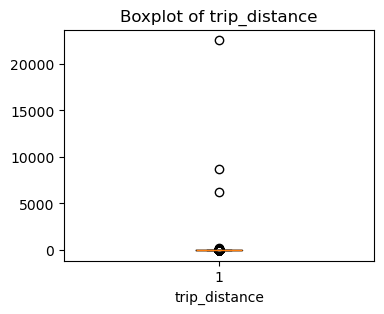

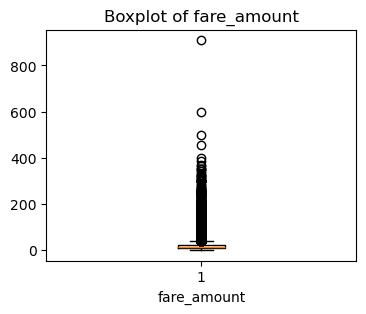

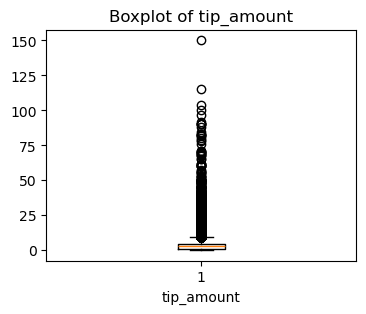

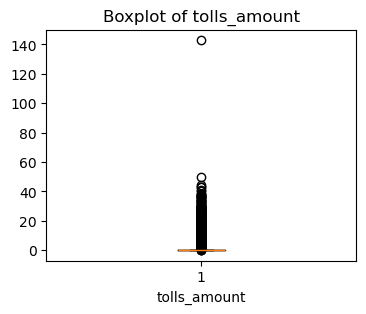

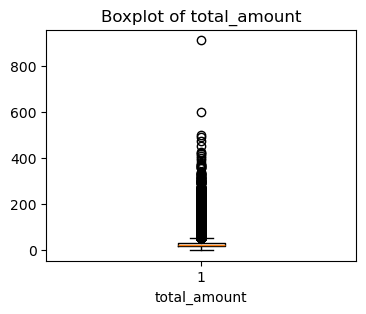

In [83]:
#visual inspection

#loop through each numeric column and plot a boxplot
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

for col in numeric_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(df[col].dropna()) #used dropna as best practice to avoid errors
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()
    plt.close() # prevents memory build up 

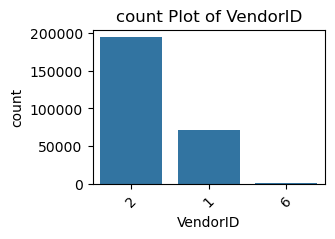

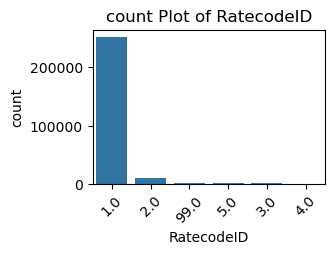

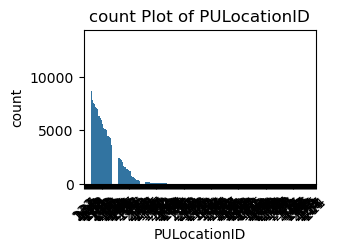

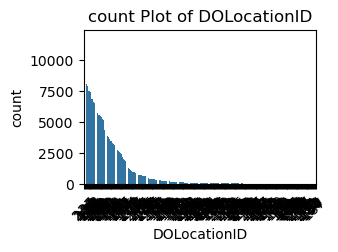

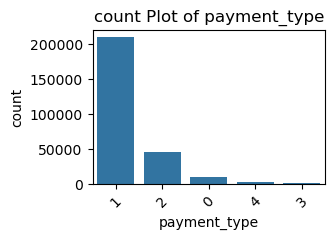

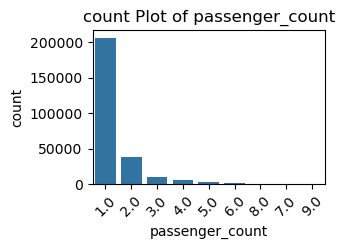

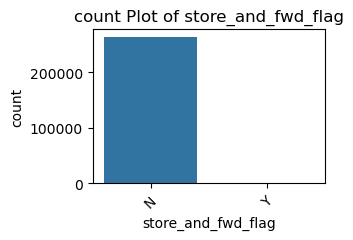

In [84]:
categorical_cols = ['VendorID','RatecodeID','PULocationID','DOLocationID','payment_type','passenger_count','store_and_fwd_flag']
for col in categorical_cols:
    plt.figure(figsize=(3,2))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [85]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
mask1 = (df["trip_distance"] <= 0.1) & (df["fare_amount"]>300)
df=df[~mask1]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones
mask2 = (df["trip_distance"] ==0) & (df["fare_amount"] == 0) & (df['PULocationID'] != df['DOLocationID'])
df=df[~mask2]

# Entries where trip_distance is more than 250 miles.
mask3 = df['trip_distance']>250
df=df[~mask3]

# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
mask4 = df['payment_type'] == 0
df=df[~mask4]

outlier_mask= mask1|mask2|mask3|mask4
print ("Number of outliers identified:", outlier_mask.sum())

print("Cleaned shape:", df.shape)
#save cleaned dataset
df.to_parquet("cleaned data\cleaned_Taxi_Data_2.parquet", index=False)

print("✅ Outliers fixed & cleaned data saved as Cleaned_Taxi_Data_2.parquet")

Number of outliers identified: 8840
Cleaned shape: (257244, 19)
✅ Outliers fixed & cleaned data saved as Cleaned_Taxi_Data_2.parquet


How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [88]:
df=pd.read_parquet(r"cleaned data\cleaned_taxi_data_2.parquet")
df.shape

(257244, 19)

In [89]:
# remove passenger_count > 6
df=df[df['passenger_count'] <=6]

print("Remaining unique passanger counts:", df['passenger_count'].unique())
print("Shape after removal:", df.shape)

Remaining unique passanger counts: [1. 2. 3. 4. 6. 5.]
Shape after removal: (257239, 19)


In [90]:
# Continue with outlier handling
# cap extreme values in fare_amount 
df=df[df["fare_amount"] > 0] # Remove invalid values
df["fare_amount"] = df["fare_amount"].clip(upper=300)

#cap extreme values in tip amount (>100)
df=df[df["tip_amount"] >=0] # Remove -ve values of tip_amount
df["tip_amount"] = df["tip_amount"].clip(upper=100)

# Cap extreme values of total_amount
df = df[df["total_amount"] >0] #Remove -ve values of total_amount
df["total_amount"] = df["total_amount"].clip(upper=300)

#-------------------------------------------------
#Save cleaned dataset
#---------------------------------------------------
print("Final cleaned shape:", df.shape)
df.to_parquet("cleaned data\cleaned_Taxi_Data_3.parquet", index=False)

print("✅ Final outlier handling complete. Data saved as Cleaned_Taxi_Data_3.parquet")

Final cleaned shape: (257152, 19)
✅ Final outlier handling complete. Data saved as Cleaned_Taxi_Data_3.parquet


In [91]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [93]:
df=pd.read_parquet("cleaned data\cleaned_taxi_data_3.parquet")
df.shape

(257152, 19)

In [94]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [97]:
numeric_but_categorical = ['VendorID','RatecodeID','payment_type', 'passenger_count','PULocationID','DOLocationID', 'pickup_hour']
continuous_numerical= ['trip_distance', 'trip_duration','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
true_categorical = ['store_and_fwd_flag']
datetime_cols = ['tpep_pickup_datetime','tpep_dropoff_datetime']

numerical_cols= continuous_numerical
categorical_cols= numeric_but_categorical+true_categorical

print("Numerical columns:", numerical_cols)
print("\nCategorical columns:", categorical_cols)
print("\nDatetime columns:", datetime_cols)


Numerical columns: ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Categorical columns: ['VendorID', 'RatecodeID', 'payment_type', 'passenger_count', 'PULocationID', 'DOLocationID', 'pickup_hour', 'store_and_fwd_flag']

Datetime columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [100]:
print(df_month['tpep_pickup_datetime'].dtypes)

datetime64[us]


In [101]:
# Find and show the hourly trends in taxi pickups
# Extract hour, weekday, month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# View Hourly distribution of pickups as table
hourly_counts = df['pickup_hour'].value_counts().sort_index()
print('Hourly pickup counts:\n', hourly_counts)

Hourly pickup counts:
 pickup_hour
0      7276
1      4801
2      3147
3      2052
4      1347
5      1384
6      3382
7      6893
8      9560
9     10967
10    11996
11    13067
12    14178
13    14631
14    15676
15    16061
16    16037
17    17333
18    18093
19    16243
20    14552
21    14477
22    13362
23    10637
Name: count, dtype: int64


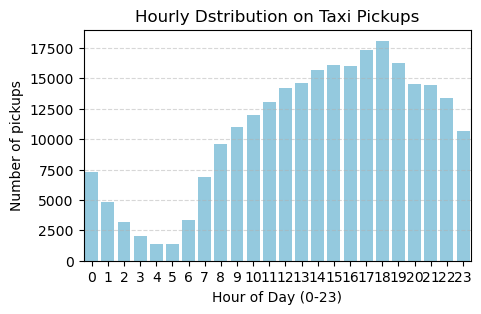

In [102]:
# Plot hourly trends
plt.figure(figsize=(5,3))
sns.countplot(x='pickup_hour', data=df, color='skyblue')

plt.title('Hourly Dstribution on Taxi Pickups')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of pickups')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Daily pickup counts (0=Mon ... 6=Sun):
 pickup_weekday
0    32114
1    37365
2    39626
3    40352
4    38106
5    37295
6    32294
Name: count, dtype: int64


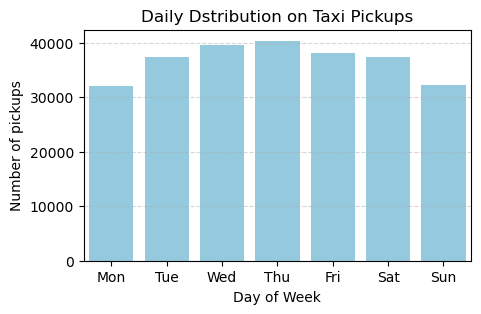

In [103]:
# Find and show the daily trends in taxi pickups (days of the week)
#1.  View Daily distribution of pickups as table
daily_counts = df['pickup_weekday'].value_counts().sort_index()
print('Daily pickup counts (0=Mon ... 6=Sun):\n', daily_counts)

#2. Plot daily Trends
weekday_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(5,3))
sns.countplot(x='pickup_weekday', data=df, color='skyblue')

plt.title('Daily Dstribution on Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of pickups')
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Monthly pickup counts:
 pickup_month
1     20814
2     19791
3     23044
4     22303
5     23749
6     22344
7     19593
8     18987
9     18776
10    23437
11    22171
12    22143
Name: count, dtype: int64


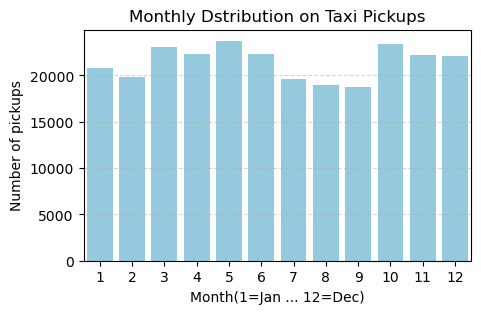

In [104]:
# Show the monthly trends in pickups
#1.  View Monthly distribution of pickups as table
monthly_counts = df['pickup_month'].value_counts().sort_index()
print('Monthly pickup counts:\n', monthly_counts)

#2. Plot monthly Trends

plt.figure(figsize=(5,3))
sns.countplot(x='pickup_month', data=df, color='skyblue')

plt.title('Monthly Dstribution on Taxi Pickups')
plt.xlabel('Month(1=Jan ... 12=Dec)')
plt.ylabel('Number of pickups')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [107]:
# Analyse the above parameters
# Check for zero/negative values
fin_cols=['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Count of zero and negative values
for col in fin_cols:
    zeros= (df[col]== 0).sum()
    negatives= (df[col]<0).sum()
    print(f"{col}: Zero values = {zeros}, negative values = {negatives}")

fare_amount: Zero values = 0, negative values = 0
tip_amount: Zero values = 57492, negative values = 0
total_amount: Zero values = 0, negative values = 0
trip_distance: Zero values = 3225, negative values = 0


In [108]:
# Description of statistics to detect negatives
df[fin_cols].describe()

,fare_amount,tip_amount,total_amount,trip_distance
count,257152.000000,257152.000000,257152.000000,257152.000000
mean,19.739453,3.576606,28.859025,3.442337
std,18.110163,4.046865,22.685990,4.531114
min,0.010000,0.000000,1.010000,0.000000
25%,9.300000,1.000000,15.960000,1.060000
50%,13.500000,2.860000,21.000000,1.790000
75%,21.900000,4.450000,30.700000,3.370000
max,300.000000,100.000000,300.000000,187.350000


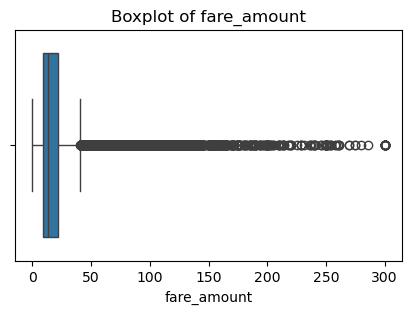

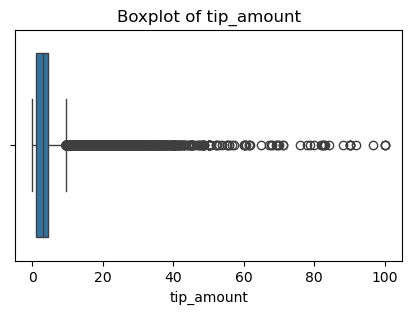

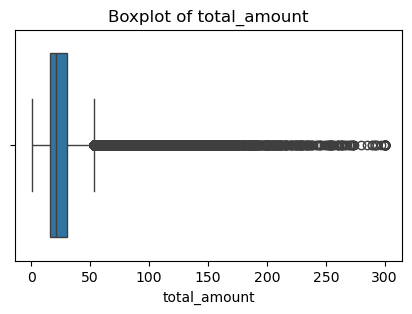

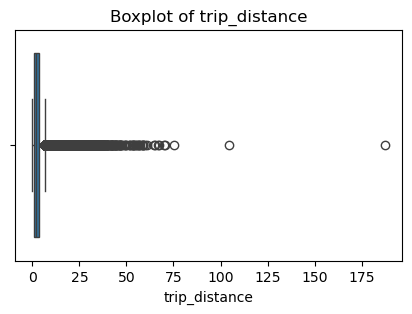

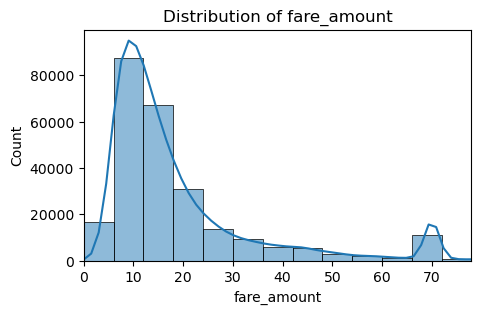

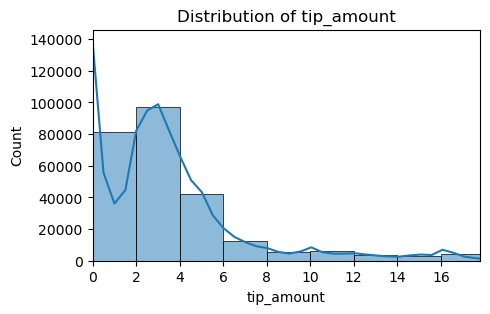

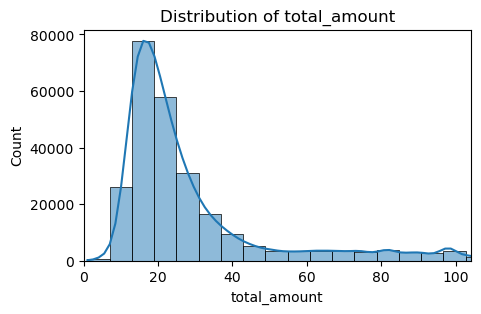

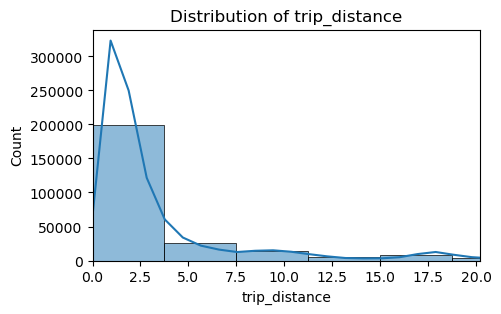

In [109]:
# visual analysis

for col in fin_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

for col in fin_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlim(0, df[col].quantile(0.99))
    plt.show()


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [112]:
# Only tip_amount and trip_distance has zero values.
# zero value in tip_amount is valid. but among zero values in trip_distance some are valid and some are invalid entries.
# Get the fare-amount and total_amount for trip_distance=0
df_zero_dist=df[df['trip_distance']==0]
df_zero_dist[['fare_amount', 'total_amount']].describe()

,fare_amount,total_amount
count,3225.000000,3225.000000
mean,29.983774,37.115516
std,36.877726,40.537060
min,0.010000,1.010000
25%,3.000000,8.000000
50%,14.200000,20.000000
75%,49.500000,55.940000
max,300.000000,300.000000


In [113]:
# all rows which have trip_distance=0 and fare_amount >0 . so keep those rows. 

In [114]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df['trip_distance']>0) & (df['tip_amount']>0)].copy()

print("✅ New dataframe created with non-zero financial parameters")
print("Shape:", df_non_zero.shape)

✅ New dataframe created with non-zero financial parameters
Shape: (198437, 22)


In [115]:
# verify 
(df_non_zero[fin_cols]== 0).sum()

fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

In [116]:
# Save data subset
df_non_zero.to_parquet("cleaned data\cleaned_taxi_financial_nonzero.parquet", index=False)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [118]:
# Group data by month and analyse monthly revenue
monthly_revenue= df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']

print(monthly_revenue)

    Month  Total_Revenue
0       1      571155.77
1       2      541417.89
2       3      649893.44
3       4      636454.00
4       5      696652.23
5       6      656004.16
6       7      564589.19
7       8      551705.18
8       9      569342.54
9      10      700955.52
10     11      640544.41
11     12      642441.63


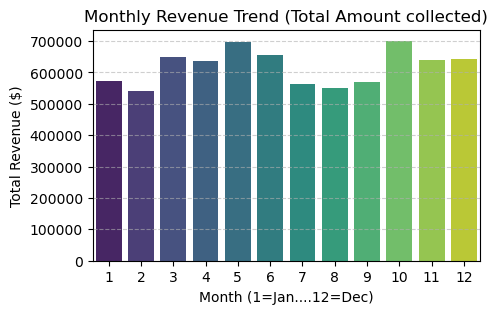

In [119]:
# visualize the monthly revenue trend

plt.figure(figsize=(5,3))
sns.barplot(x='Month', y='Total_Revenue', data=monthly_revenue, palette='viridis')

plt.title('Monthly Revenue Trend (Total Amount collected)')
plt.xlabel("Month (1=Jan....12=Dec)")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [121]:
# Calculate proportion of each quarter
# Extract quarter
df['pickup_quarter']= df['tpep_pickup_datetime'].dt.quarter
# calculate total revenue per quarter
quarterly_revenue= df.groupby('pickup_quarter')['total_amount'].sum().reset_index()

#Rename columns
quarterly_revenue.columns=['Quarter', 'Total_Revenue']

print("Quaterly Revenue:\n", quarterly_revenue)

#Calculate the proportion(%)
total_revenue_year= quarterly_revenue['Total_Revenue'].sum()
quarterly_revenue['Revenue_Proportion(%)'] = (quarterly_revenue['Total_Revenue']/total_revenue_year)*100

print("\nQuaterly Revenue with Proportion:\n", quarterly_revenue)

Quaterly Revenue:
    Quarter  Total_Revenue
0        1     1762467.10
1        2     1989110.39
2        3     1685636.91
3        4     1983941.56

Quaterly Revenue with Proportion:
    Quarter  Total_Revenue  Revenue_Proportion(%)
0        1     1762467.10              23.749226
1        2     1989110.39              26.803242
2        3     1685636.91              22.713940
3        4     1983941.56              26.733592


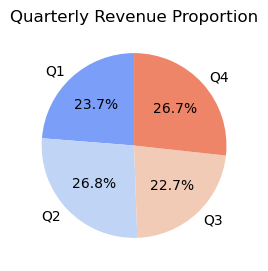

In [122]:
# Visualize the propertion
plt.figure(figsize=(5,3))
plt.pie(
    quarterly_revenue['Revenue_Proportion(%)'],
    labels=[f"Q{q}" for q in quarterly_revenue['Quarter']],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("coolwarm", 4)
)
plt.title("Quarterly Revenue Proportion")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [124]:
# Keep only valid trips (non-zero distance)
df_dist = df[df['trip_distance'] >0].copy()

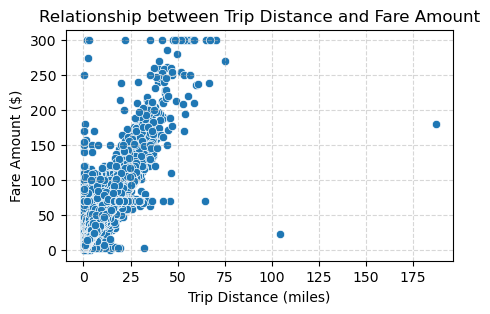

In [125]:
# Show how trip fare is affected by distance
# visualize the relationship
plt.figure(figsize=(5,3))
sns.scatterplot(x='trip_distance', y='fare_amount', data= df_dist)

plt.title("Relationship between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [126]:
# Calculate the correlation
correlation = df_dist['trip_distance'].corr(df_dist['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.3f}")

Correlation between trip_distance and fare_amount: 0.944


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration:0.256


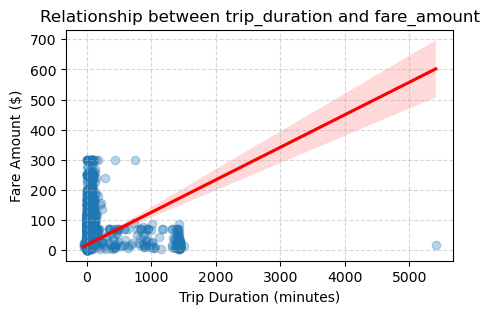

In [128]:
# Show relationship between fare and trip duration
# Calculate trip_duration in minutes
df['trip_duration']= (df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']).dt.total_seconds()/60

#correlation between fare_amount and trip_duration
corr_fare_dur=df['fare_amount'].corr(df['trip_duration'])
print (f"Correlation between fare_amount and trip_duration:{corr_fare_dur:.3f}")

# Visualization
plt.figure(figsize=(5,3))
sns.regplot(x='trip_duration', y='fare_amount', data= df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

plt.title("Relationship between trip_duration and fare_amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Correlation between fare_amount and passenger_count:0.044


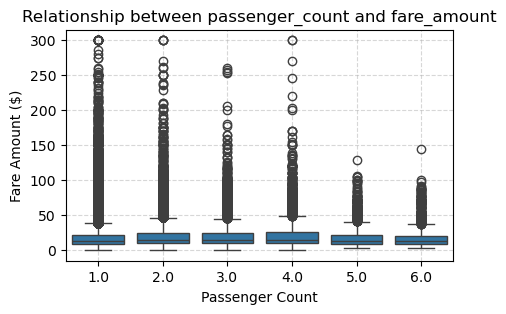

In [129]:
# Show relationship between fare and number of passengers
corr_fare_pass = df['fare_amount'].corr(df['passenger_count'])
print (f"Correlation between fare_amount and passenger_count:{corr_fare_pass:.3f}")

# Visualization
plt.figure(figsize=(5,3))
sns.boxplot(x='passenger_count', y='fare_amount', data= df)

plt.title("Relationship between passenger_count and fare_amount")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Correlation between tip_amount and trip_distance:0.578


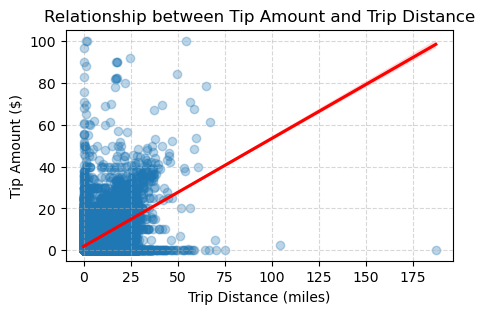

In [130]:
# Show relationship between tip and trip distance
corr_tip_dist=df['tip_amount'].corr(df['trip_distance'])
print (f"Correlation between tip_amount and trip_distance:{corr_tip_dist:.3f}")

# Visualization
plt.figure(figsize=(5,3))
sns.regplot(x='trip_distance', y='tip_amount', data= df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

plt.title("Relationship between Tip Amount and Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [132]:
# Analyse the distribution of different payment types (payment_type).
# Map payment codes to labels
payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
df['payment_type_label'] = df['payment_type'].map(payment_mapping)

# Check distribution (count and propertion)
payment_counts = df['payment_type_label'].value_counts()
payment_percent = df['payment_type_label'].value_counts(normalize=True) * 100

print("Payment Type Counts:\n", payment_counts)
print("\nPayment Type Percentage:\n", payment_percent.round(2))

Payment Type Counts:
 payment_type_label
Credit Card    209476
Cash            44573
Dispute          1898
No Charge        1205
Name: count, dtype: int64

Payment Type Percentage:
 payment_type_label
Credit Card    81.46
Cash           17.33
Dispute         0.74
No Charge       0.47
Name: proportion, dtype: float64


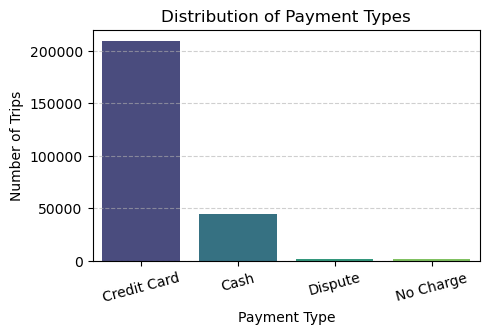

In [133]:
# Visualization
# Visualize distribution
plt.figure(figsize=(5,3))
sns.countplot(x='payment_type_label', data=df, palette='viridis',
              order=df['payment_type_label'].value_counts().index)

plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

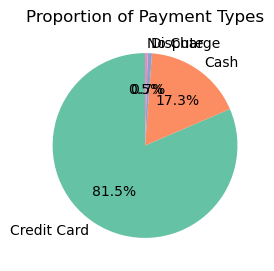

In [134]:
# visualize proportion
plt.figure(figsize=(5,3))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=90,labeldistance=1.1, colors=sns.color_palette('Set2', len(payment_counts)))
plt.title("Proportion of Payment Types")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [139]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [141]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Niroj\Desktop\EDA assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp')# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

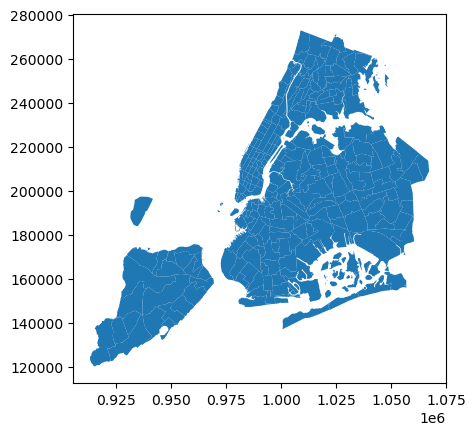

In [143]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [146]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head() # Display Data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_quarter,trip_duration,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,1,15.950000,Cash,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1,5.083333,Credit Card,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1,10.550000,Cash,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1,5.416667,Cash,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,1,33.616667,Credit Card,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [148]:
# Group data by location and calculate the number of trips
location_trips = merged_df.groupby('LocationID')['tpep_pickup_datetime'].count().reset_index()
location_trips.rename(columns = {'tpep_pickup_datetime': 'trip_count'}, inplace = True)

#check result
location_trips.head(3)

,LocationID,trip_count
0,1.0,38
1,3.0,9
2,4.0,245


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [208]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(location_trips, on='LocationID', how='left')
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",38.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",9.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",245.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

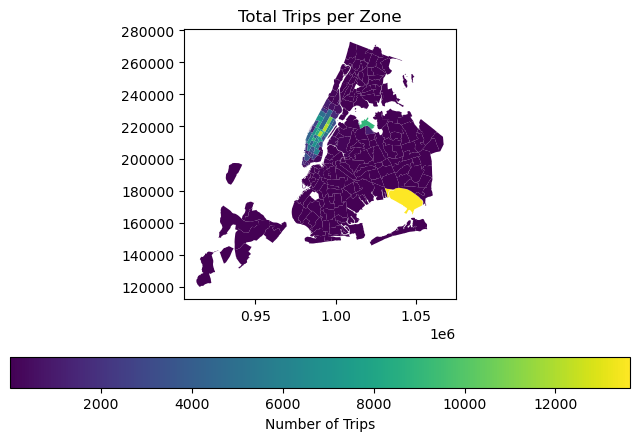

In [220]:
# Define figure and axis
fig, ax = plt.subplots(1,1, figsize=(8,5))

# Plot the map and display it
zones_with_trips.plot(
    column = 'trip_count',
    ax = ax,
    legend = True,
    legend_kwds = {'label': "Number of Trips", 'orientation': "horizontal"},
    cmap='viridis'

)
plt.title('Total Trips per Zone')
plt.show()


In [155]:
# can you try displaying the zones DF sorted by the number of trips?
# sort the zone DF in descending order of trip_counts
zones_sorted_by_trips = zones_with_trips.sort_values(by='trip_count', ascending=False)
zones_sorted_by_trips.head() #display data

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",13639.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",12135.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",12057.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",10812.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",9309.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [164]:
# Find routes which have the slowest speeds at different times of the day
# Create a copy of relevant columns
route_data= df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()

# Calculate trip duration in hour
route_data['trip_duration_hrs'] = (route_data['tpep_dropoff_datetime'] - route_data['tpep_pickup_datetime']).dt.total_seconds() / 3600

# filter out invalid trips
route_data = route_data[(route_data['trip_duration_hrs'] > 0) & (route_data['trip_distance'] > 0)]

# extract pickup hour
route_data['pickup_hour'] = route_data['tpep_pickup_datetime'].dt.hour

# Group by route and hour
grouped_route_data = route_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

# Aggregate mean distance and duration
speed_data = grouped_route_data.agg({'trip_distance': 'mean','trip_duration_hrs': 'mean'}).reset_index()

# Calculate average speed
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']

# Identify slowest routes
slowest_routes= speed_data.sort_values(by='avg_speed_mph').head(10)

# Display results
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])

       PULocationID  DOLocationID  pickup_hour  avg_speed_mph
15904           113           113           13       0.025129
44025           226           145           18       0.026569
57262           260           129           17       0.040746
60053           264           237           15       0.043036
42540           209           232           13       0.043579
16448           113           235           22       0.048105
42140           193           193           13       0.052326
5047             50            43            8       0.059525
37590           164           100           21       0.067827
21922           134           265           15       0.073831


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

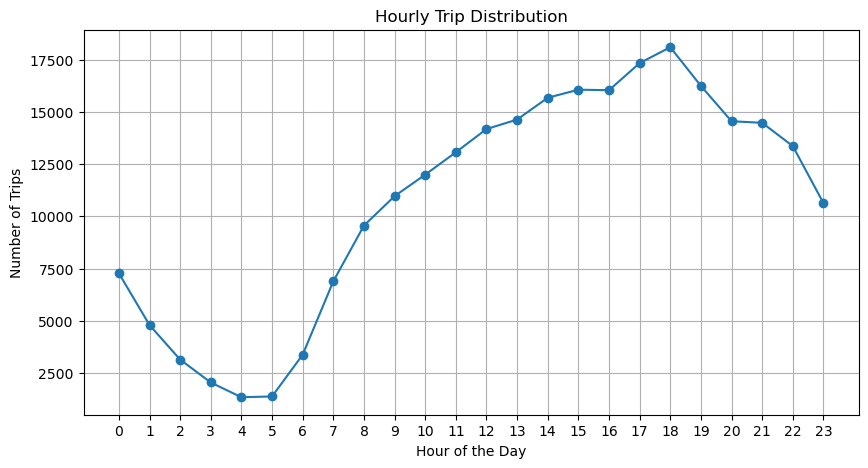

Busiest hour: 18
Number of trips during busiest hour: 18093


In [167]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour # extract pickup hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')

# Find busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

# Plot hourly trip distribution
plt.figure(figsize=(10, 5))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24)) 
plt.grid(True)
plt.show()

# Display busiest hour
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [170]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.007

five_busiest_hours=hourly_trips['trip_count'].sort_values(ascending=False)
scale_up= (five_busiest_hours/sample_fraction).astype(int)
five_busiest_hours.head()



18    18093
17    17333
19    16243
15    16061
16    16037
Name: trip_count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

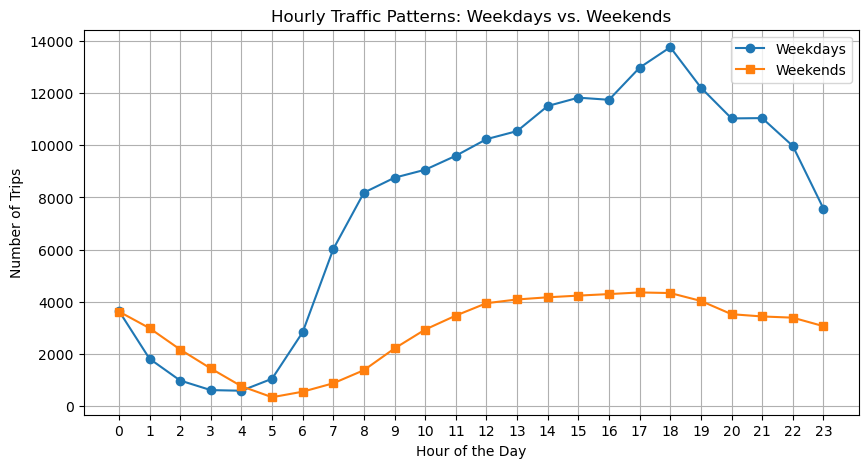

In [172]:
# Compare traffic trends for the week days and weekends
# Add a 'day_type' column
df['day_type'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Extract data
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by day_type and pickup_hour
hourly_counts = df.groupby(['day_type', 'pickup_hour'])['tpep_pickup_datetime'].count().unstack(0)

# Visualise the comparison
plt.figure(figsize=(10,5))
plt.plot(hourly_counts.index, hourly_counts['Weekday'], marker='o', label='Weekdays')
plt.plot(hourly_counts.index, hourly_counts['Weekend'], marker='s', label='Weekends')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [175]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup Zones
pickup_trip_count = df.groupby('PULocationID')['tpep_pickup_datetime'].count().reset_index()
pickup_trip_count.columns= ['LocationID', 'Pickup_Trips']

# merge with zones to get zone names
pickup_trip_count= pickup_trip_count.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

#Descending order
top10_pickup_zones = pickup_trip_count.sort_values(by='Pickup_Trips', ascending=False).head(10)
print(" Top 10 pickup zones")
top10_pickup_zones


 Top 10 pickup zones


,LocationID,Pickup_Trips,zone
117,132,13639,JFK Airport
213,237,12135,Upper East Side South
145,161,12057,Midtown Center
212,236,10812,Upper East Side North
146,162,9309,Midtown East
123,138,9001,LaGuardia Airport
166,186,8762,Penn Station/Madison Sq West
206,230,8603,Times Sq/Theatre District
127,142,8394,Lincoln Square East
154,170,7587,Murray Hill


In [176]:
# Top 10 dropoff Zones
# Count dropoffs by location ID
dropoff_trip_count = df.groupby('DOLocationID')['tpep_dropoff_datetime'].count().reset_index()
dropoff_trip_count.columns= ['LocationID', 'Dropoff_Trips']

# merge with zones to get zone names
dropoff_trip_count= dropoff_trip_count.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

#Descending order
top10_dropoff_zones = dropoff_trip_count.sort_values(by='Dropoff_Trips', ascending=False).head(10)
print(" Top 10 dropoff zones")
top10_dropoff_zones



 Top 10 dropoff zones


,LocationID,Dropoff_Trips,zone
226,236,11487,Upper East Side North
227,237,10770,Upper East Side South
154,161,10042,Midtown Center
220,230,7817,Times Sq/Theatre District
163,170,7654,Murray Hill
155,162,7326,Midtown East
135,142,7288,Lincoln Square East
229,239,7185,Upper West Side South
134,141,6665,Lenox Hill West
67,68,6579,East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [178]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Merge pickup and dropoff counts
zone_counts = pickup_trip_count [['LocationID', 'Pickup_Trips']].merge(dropoff_trip_count[['LocationID', 'Dropoff_Trips']], on='LocationID', how='outer')

# Fill missing values with 0 
zone_counts['Pickup_Trips'] = zone_counts['Pickup_Trips'].fillna(0)
zone_counts['Dropoff_Trips'] = zone_counts['Dropoff_Trips'].fillna(0)

# Calculate ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['Pickup_Trips'] / zone_counts['Dropoff_Trips'].replace(0, np.nan)

# Merge zone names
zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], on ='LocationID', how='left')

# Find top 10 and bottom 10 pickup/dropoff ratios
top10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print("Top 10 Pickup/Dropoff Ratios:")
top10_ratio[['zone', 'Pickup_Trips', 'Dropoff_Trips', 'pickup_dropoff_ratio']]



Top 10 Pickup/Dropoff Ratios:


,zone,Pickup_Trips,Dropoff_Trips,pickup_dropoff_ratio
75,East Elmhurst,1187.0,145,8.186207
131,JFK Airport,13639.0,2890,4.719377
137,LaGuardia Airport,9001.0,3101,2.902612
183,Penn Station/Madison Sq West,8762.0,5797,1.511471
41,Central Park,4399.0,3158,1.392970
245,West Village,5734.0,4202,1.364588
114,Greenwich Village South,3352.0,2489,1.346726
161,Midtown East,9309.0,7326,1.270680
160,Midtown Center,12057.0,10042,1.200657
104,Garment District,4202.0,3532,1.189694


In [179]:
print("Bottom 10 Pickup/Dropoff Ratios:")
bottom10_ratio[['zone', 'Pickup_Trips', 'Dropoff_Trips', 'pickup_dropoff_ratio']]


Bottom 10 Pickup/Dropoff Ratios:


,zone,Pickup_Trips,Dropoff_Trips,pickup_dropoff_ratio
119,Highbridge Park,0.0,11,0.0
181,Pelham Bay Park,0.0,2,0.0
155,Mariners Harbor,0.0,1,0.0
202,Saint George/New Brighton,0.0,4,0.0
200,Rossville/Woodrow,0.0,3,0.0
25,Breezy Point/Fort Tilden/Riis Beach,0.0,4,0.0
111,Green-Wood Cemetery,0.0,3,0.0
217,Stapleton,0.0,3,0.0
64,Crotona Park,0.0,1,0.0
63,Country Club,0.0,9,0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [181]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours
night_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]

# Merge to get pickup zone names
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
# Merge to get dropoff zone names
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
# Group by pickup zones
top_night_pickups = night_df.groupby('pickup_zone')['PULocationID'].count().sort_values(ascending=False).head(10)
# Group by dropoff zones
top_night_dropoffs = night_df.groupby('dropoff_zone')['DOLocationID'].count().sort_values(ascending=False).head(10)

# Display top 10 pickup zones during night hours
print("Top 10 Pickup zones during night hours (11pm to 5am):")
top_night_pickups

Top 10 Pickup zones during night hours (11pm to 5am):


pickup_zone
East Village                    2161
JFK Airport                     1915
West Village                    1766
Lower East Side                 1372
Clinton East                    1366
Greenwich Village South         1187
Times Sq/Theatre District       1154
LaGuardia Airport                896
Penn Station/Madison Sq West     883
Midtown South                    834
Name: PULocationID, dtype: int64

In [182]:
# Display top 10 dropoff zones during night hours
print("Top 10 Dropoff zones during night hours (11pm to 5am):")
top_night_dropoffs

Top 10 Dropoff zones during night hours (11pm to 5am):


dropoff_zone
East Village       1165
Clinton East        960
Murray Hill         858
Gramercy            817
East Chelsea        810
Lenox Hill West     734
Yorkville West      715
West Village        675
Flatiron            632
Lower East Side     624
Name: DOLocationID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [184]:
# Filter for night hours (11 PM to 5 AM)

# filter for nighttime and daytime hours.
nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

# compute total revenue
nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()
total_revenue = df['total_amount'].sum()

# Revenue share as a percentage of total revenue.
nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

# Display result
print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Nighttime Revenue Share: 12.25%
Daytime Revenue Share: 87.75%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [187]:
# Analyse the fare per mile per passenger for different passenger counts

Valid_Fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy() # filter out invalid trips
# calculate fare per mile per passenger
Valid_Fares = Valid_Fares.assign(
    fare_per_mile_per_passenger = Valid_Fares['total_amount'] / (Valid_Fares['trip_distance'] * Valid_Fares['passenger_count'])
)

avg_fare_by_passenger = Valid_Fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger

passenger_count
1.0    16.536024
2.0     9.267888
3.0     6.186545
4.0     6.816272
5.0     2.609565
6.0     2.104039
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [189]:
# Compare the average fare per mile for different days and for different times of the day
valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)].copy()

valid_df = valid_df.assign(
    day_of_week = valid_df['tpep_pickup_datetime'].dt.day_name(),
    hour_of_day = valid_df['tpep_pickup_datetime'].dt.hour,
    fare_per_mile = valid_df['total_amount'] / valid_df['trip_distance']
)

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)
fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

# order the days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)

In [190]:
fare_by_day

day_of_week
Monday       15.66
Tuesday      17.19
Wednesday    17.91
Thursday     19.23
Friday       15.59
Saturday     16.52
Sunday       16.85
Name: fare_per_mile, dtype: float64

In [191]:
fare_by_hour

hour_of_day
0     17.03
1     21.40
2     14.49
3     17.92
4     28.43
5     16.53
6     18.86
7     13.22
8     15.00
9     15.16
10    15.70
11    16.34
12    17.18
13    18.40
14    17.87
15    15.85
16    20.97
17    18.80
18    17.82
19    18.86
20    15.09
21    14.22
22    17.28
23    14.64
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

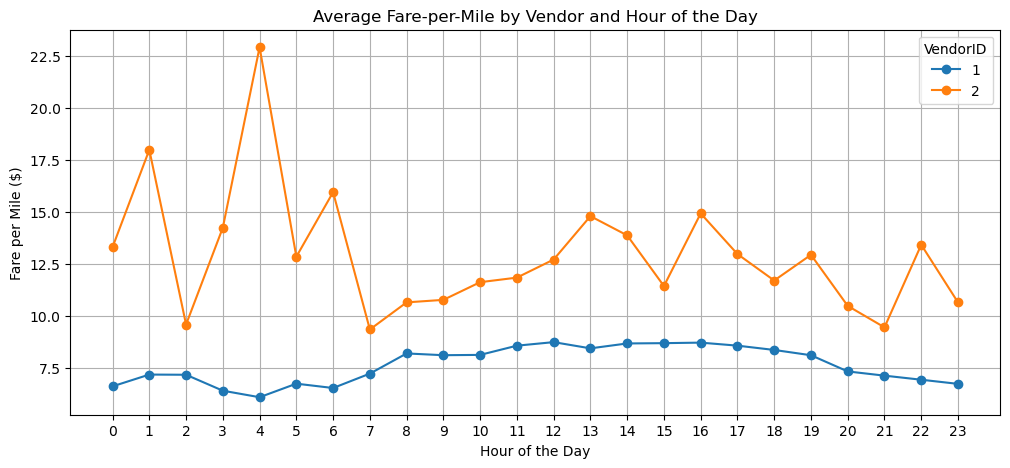

In [193]:
# Compare fare per mile for different vendors
# Filter out trips
df_vendor = df[df['trip_distance'] > 0].copy()

# calculate fare per mile
df_vendor= df_vendor.assign(
    fare_per_mile = df_vendor['fare_amount'] / df_vendor['trip_distance'],
    hour_of_day = df_vendor['tpep_pickup_datetime'].dt.hour
)

vendor_hourly_fare = df_vendor.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().unstack()

# Visualization
vendor_hourly_fare.T.plot(figsize=(12,5), marker='o')
plt.title('Average Fare-per-Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare per Mile ($)')
plt.grid(True)
plt.xticks(range(0,24))
plt.legend(title='VendorID')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


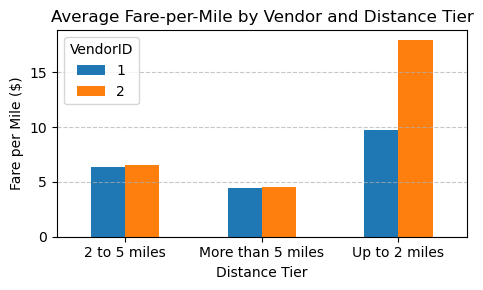

In [195]:
# Defining distance tiers
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Avoid division by zero

tier1 = df[df['trip_distance'] <= 2].copy()
tier2 = df[(df['trip_distance'] > 2) & (df['trip_distance'] <= 5)].copy()
tier3 = df[df['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(5, 3))
plt.title('Average Fare-per-Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [198]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df = df[df['trip_distance'] > 0].copy()
df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100

# Categorize
df['distance_category'] = pd.cut(df['trip_distance'], [0, 2, 5, float('inf')],
                                 labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])
df['passenger_category'] = pd.cut(df['passenger_count'], [0, 1, 3, float('inf')],
                                  labels=['1 passenger', '2-3 passengers', '4+ passengers'])
df['time_category'] = pd.cut(df['pickup_hour'], [0, 6, 12, 18, 24],
                             labels=['Midnight–6AM', '6AM–Noon', 'Noon–6PM', '6PM–Midnight'],
                             right=False)

# Use pivot_table
summary = df.pivot_table(
    index=['distance_category', 'passenger_category', 'time_category'],
    values='tip_percentage',
    aggfunc='mean'
).round(2)

print(summary.sort_values('tip_percentage'))

                                                    tip_percentage
distance_category passenger_category time_category                
More than 5 miles 4+ passengers      Midnight–6AM            10.17
                                     6AM–Noon                10.44
                                     Noon–6PM                10.54
                  1 passenger        Midnight–6AM            10.67
2 to 5 miles      4+ passengers      6AM–Noon                10.74
More than 5 miles 2-3 passengers     Noon–6PM                10.87
                                     Midnight–6AM            10.93
                  1 passenger        6AM–Noon                10.94
                  4+ passengers      6PM–Midnight            11.04
                  2-3 passengers     6AM–Noon                11.07
2 to 5 miles      4+ passengers      Noon–6PM                11.23
More than 5 miles 2-3 passengers     6PM–Midnight            11.28
Up to 2 miles     4+ passengers      Noon–6PM                1

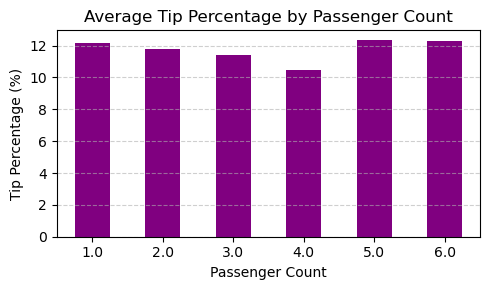

In [199]:
# Visualization
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(5, 3), color='purple')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

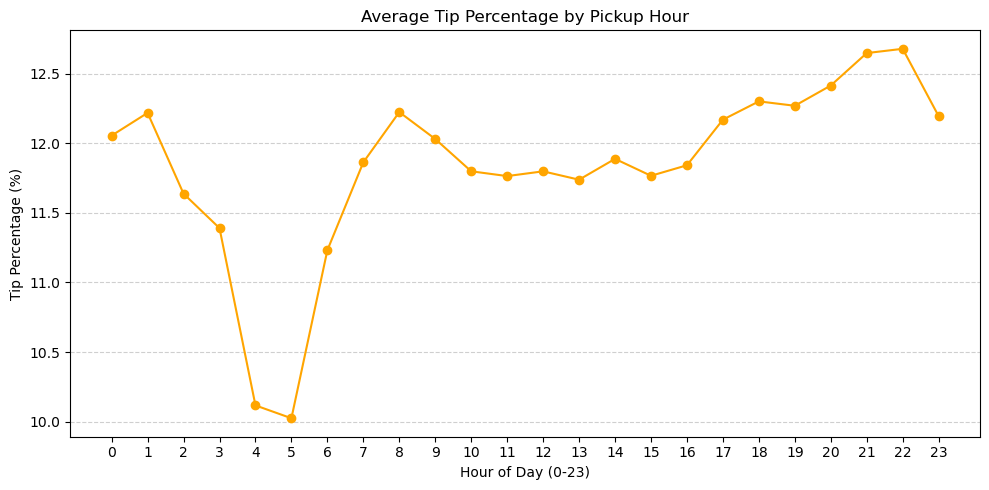

In [200]:
# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='orange')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Average Comparison Between Low (<10%) and High (>25%) Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              3.89             2.30
Avg Passenger Count            1.42             1.36
Avg Fare Amount               21.42            14.41
Avg Tip Amount                 0.28             4.43


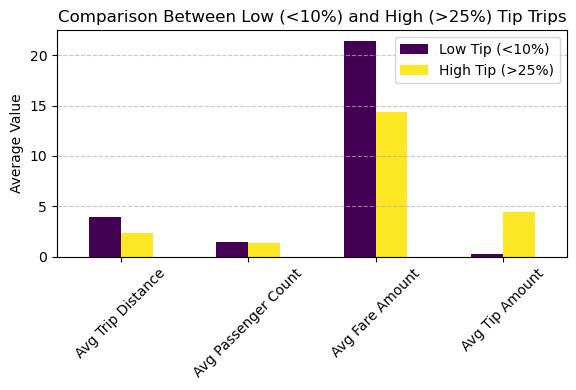

In [202]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low (<10%) and High (>25%) Tip Trips:")
print(comparison.round(2))

# Visualization
comparison.plot(kind='bar', figsize=(6, 4), colormap='viridis')
plt.title('Comparison Between Low (<10%) and High (>25%) Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

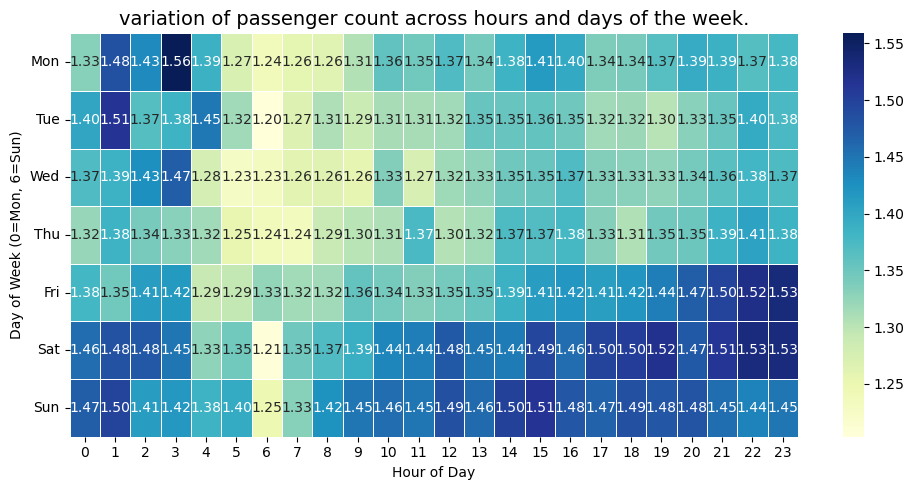

In [204]:
# See how passenger count varies across hours and days
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('variation of passenger count across hours and days of the week.', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

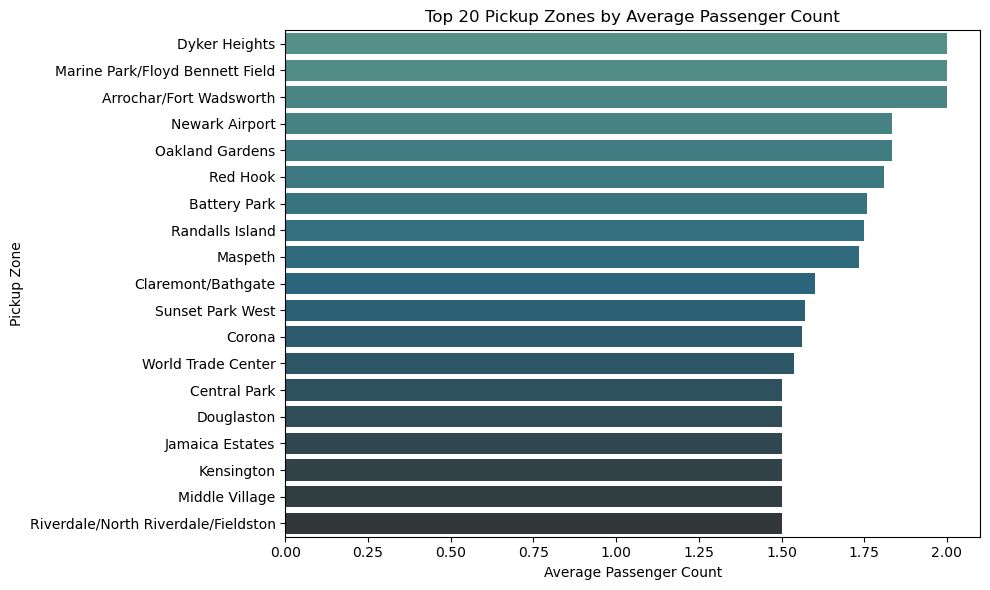

In [206]:
# How does passenger count vary across zones
zone_passenger_average = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_average = zone_passenger_average.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_average = zone_passenger_average.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=zone_passenger_average, x='passenger_count', y='zone', palette='crest_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


In [218]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Compute average passenger count per pickup zone
average_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with zone shapefile data 
zones_with_trips = zones_with_trips.merge(
    average_passenger_by_zone,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

#Display
zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count,PULocationID,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",38.0,1.0,1.833333
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",9.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",245.0,4.0,1.371901
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                  'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    x=surcharge_frequency.values,
    y=surcharge_frequency.index,
    palette='crest'
)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Frequency (%)')
plt.ylabel('Surcharge Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#### Recommendations for Strategy and Optimization

##### 1. Demand-aware vehicle allocation

* The hourly plots and heatmap show clear morning and evening peaks e.g., 8:00 appears in the analysis. Allocate more vehicles to identified high-demand zones during those peak windows.

* Maintain a smaller, steady presence in entertainment/nighttime areas shown in the heatmaps to preserve availability overnight.

##### 2. Zone-level dispatching

* The zone/heatmap outputs list specific zones and airport corridors (examples appear in above analysis: Midtown, JFK, LaGuardia, Chelsea, Upper East/Upper West, Bronx, Queens, Staten Island). Treat the high-density zones as priority dispatch areas and increase vehicle concentration there.

* For under-served zones visible in the zone analysis, consider targeted measures (operational reallocation or routing adjustments) to improve coverage.

##### 3. Traffic-aware routing and path optimization

* optimize travel paths using shortest-path routing while factoring in congestion. Use traffic-aware routing to avoid slow corridors identified in route-speed plots and reduce trip times.

##### 4. Reduce idle time and improve driver utilization

*  Prioritize assigning the nearest available driver to a forecasted pickup to reduce deadhead travel and idle minutes—this is supported by the “driver utilization” and “idle” mentions in the analysis above.

##### 5. Dynamic / predictive dispatching

* Implement a demand-prediction component (using the hourly and monthly patterns already plotted) to plan vehicle distribution before peak windows and major seasonal spikes.

##### 6. Fare and congestion considerations

* Use the fare and surcharge information that appears in the plots to inform time-based operational decisions (for example, prioritizing airport and congestion-affected trips when surcharges apply).

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##### 1. Morning (around 8:00 AM):
* The hourly pickup plots show a noticeable increase in demand starting around 8:00 AM, consistent with commuters traveling from residential areas toward central business zones.
* Recommended action: Position a higher share of cabs in Midtown, the Financial District, and nearby commercial areas during this window.

##### 2. Evening Rush Hours (after 5 PM):
* The same hourly analysis shows another strong increase during evening hours as passengers return home or travel to leisure zones.
* Recommended action: Shift part of the fleet toward Chelsea, Upper East Side, and Upper West Side, where the pickup heatmaps in your plots show recurring evening activity.

##### 3. Night and Midnight Hours:
* According to hourly and night-hour plots, trip volumes remain steady through late-night and early-morning hours, especially around JFK and LaGuardia airport corridors and entertainment regions.
* Recommended action: Keep a smaller but steady number of cabs positioned near airport terminals and nighttime activity zones to serve passengers arriving from late flights or nightlife areas.

##### Weekday vs Weekend:
* The weekday/weekend comparison plots indicate that weekend nights have higher trip counts in zones with restaurants and nightlife (e.g., Chelsea, Financial District).
* Recommended action: Increase late-evening coverage in these areas on Fridays and Saturdays while slightly reducing weekday midnight deployments to optimize utilization.

##### Outer Borough Balancing:
* Heatmaps show fewer pickups in Bronx, Queens, and Staten Island compared to central Manhattan.
* Recommended action: Use short-term predictive logic to temporarily reallocate cabs from low-demand Midtown blocks to these outer boroughs when utilization is low.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##### Time-of-Day Fare Differentiation:
* Since both the 8:00 AM morning and evening hours exhibit clear demand peaks, a small peak-hour multiplier can be applied during those windows to balance supply and demand without overpricing off-peak riders. 

##### Congestion-Linked Adjustments:
*  Recommendation: Integrate surcharge dynamically, applying it during hours and routes where the route-speed and fare analyses indicate frequent slow travel (for example, evening trips between Midtown and the airports). This ensures fair compensation for time lost in traffic and aligns price with trip duration.

##### Distance-Tiered Fare Refinement:
* The fare vs. distance plots show the fare increasing roughly linearly with distance.
* Recommendation: Review short-distance (under 2 miles) and long-distance (>10 miles) trip fare efficiency. Slightly adjust the base fare or minimum charge for very short trips to cover idle time, while maintaining per-mile rates for long airport rides.

##### Vendor-Level Pricing Balance:
* Differences in fare and tip distributions can guide competitive pricing—keeping base fares aligned across vendors while allowing small variations in surcharge handling or promotional discounts to attract riders.